# Predict hydraulic failure
### this code is based upon: https://www.kaggle.com/juebrauer/predicting-pump-failure-with-a-mlp
### only the dataset was changed to use:
### https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems

### Purpose is to explore/learn ML techniques

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [222]:
%%bigquery dataset
select 
TimeStamp                      ,
Stable                         ,
Cooler_Condition               ,
Hydraulic_Accumulator          ,
Internal_Pump_Leakage          ,
Valve_Condition                ,
Cooling_Efficiency             ,
Cooling_Power                  ,
Efficiency_Factor              ,
Motor_Power                    ,
Pressure1                      ,
Pressure2                      ,
Pressure3                      ,
Pressure4                      ,
Pressure5                      ,
Pressure6                      ,
Temperature1                   ,
Temperature2                   ,
Temperature3                   ,
Temperature4                   ,
Vibration                      ,
Volume_Flow1                   ,
Volume_Flow2                   
from `osi-pi-gcp-accelerator.PI_Integrator_Data.Condition_Monitoring_Hydraulics_One_Second_Interpolation`
order by TimeStamp

In [3]:
dataset.dtypes

TimeStamp                datetime64[ns, UTC]
Stable                               float64
Cooler_Condition                     float64
Hydraulic_Accumulator                float64
Internal_Pump_Leakage                float64
Valve_Condition                      float64
Cooling_Efficiency                   float64
Cooling_Power                        float64
Efficiency_Factor                    float64
Motor_Power                          float64
Pressure1                            float64
Pressure2                            float64
Pressure3                            float64
Pressure4                            float64
Pressure5                            float64
Pressure6                            float64
Temperature1                         float64
Temperature2                         float64
Temperature3                         float64
Temperature4                         float64
Vibration                            float64
Volume_Flow1                         float64
Volume_Flo

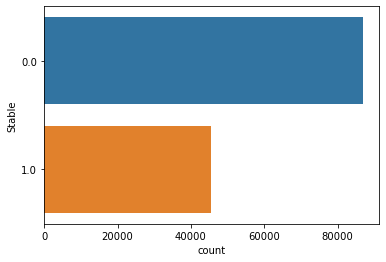

In [4]:
sns.countplot(y = dataset['Stable']);

In [5]:
# check for null values
dataset.isna().sum()

TimeStamp                0
Stable                   0
Cooler_Condition         0
Hydraulic_Accumulator    0
Internal_Pump_Leakage    0
Valve_Condition          0
Cooling_Efficiency       0
Cooling_Power            0
Efficiency_Factor        0
Motor_Power              0
Pressure1                0
Pressure2                0
Pressure3                0
Pressure4                0
Pressure5                0
Pressure6                0
Temperature1             0
Temperature2             0
Temperature3             0
Temperature4             0
Vibration                0
Volume_Flow1             0
Volume_Flow2             0
dtype: int64

In [6]:
dataset.head()

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
0,2020-02-11 00:00:00+00:00,1.0,3.0,130.0,0.0,100.0,47.202,2.184,68.039,2411.6,151.47,125.500,2.305,0.0,9.936,9.818,35.570,40.961,38.320,30.363,0.604,8.990,10.179
1,2020-02-11 00:00:01+00:00,1.0,3.0,130.0,0.0,100.0,47.273,2.184,0.000,2936.6,191.46,0.430,0.000,0.0,9.974,9.846,35.492,40.949,38.332,30.375,0.605,0.001,10.176
2,2020-02-11 00:00:02+00:00,1.0,3.0,130.0,0.0,100.0,47.250,2.184,0.000,2656.2,179.09,0.133,0.000,0.0,9.984,9.865,35.469,40.965,38.320,30.367,0.611,0.005,10.163
3,2020-02-11 00:00:03+00:00,1.0,3.0,130.0,0.0,100.0,47.332,2.185,0.000,2949.4,191.43,0.000,0.000,0.0,9.947,9.823,35.422,40.922,38.324,30.367,0.603,0.000,10.167
4,2020-02-11 00:00:04+00:00,1.0,3.0,130.0,0.0,100.0,47.213,2.178,0.000,2945.8,191.36,0.000,0.000,0.0,9.964,9.847,35.414,40.879,38.332,30.379,0.608,0.000,10.167


In [7]:
len(dataset)
dataset.tail()

132301

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
132296,2020-02-12 12:44:56+00:00,0.0,100.0,90.0,0.0,100.0,46.432,2.146,68.167,2415.6,151.84,125.50,2.352,10.207,9.962,9.846,35.437,40.895,38.184,30.391,0.528,7.858,10.196
132297,2020-02-12 12:44:57+00:00,0.0,100.0,90.0,0.0,100.0,46.384,2.144,68.258,2417.4,151.81,125.78,2.305,10.198,9.965,9.851,35.434,40.883,38.184,30.395,0.522,8.013,10.194
132298,2020-02-12 12:44:58+00:00,0.0,100.0,90.0,0.0,100.0,46.479,2.136,68.258,2417.6,151.81,125.79,2.406,10.241,10.014,9.896,35.434,40.879,38.184,30.402,0.522,7.710,10.167
132299,2020-02-12 12:44:59+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2415.6,151.77,125.55,2.297,10.216,9.974,9.856,35.426,40.891,38.187,30.375,0.531,7.866,10.182
132300,2020-02-12 12:45:00+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2417.0,151.70,125.77,2.250,10.212,9.964,9.854,35.426,40.891,38.187,30.375,0.531,7.774,10.176


In [8]:
# extra row care of interpolation, remove it
dataset.drop([132300],inplace=True)

In [9]:
len(dataset)
dataset.tail(1)

132300

,TimeStamp,Stable,Cooler_Condition,Hydraulic_Accumulator,Internal_Pump_Leakage,Valve_Condition,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
132299,2020-02-12 12:44:59+00:00,0.0,100.0,90.0,0.0,100.0,46.621,2.148,68.117,2415.6,151.77,125.55,2.297,10.216,9.974,9.856,35.426,40.891,38.187,30.375,0.531,7.866,10.182


In [78]:
# get one record per test
tests = [loc for loc in range(0,len(dataset)) if (loc % 60) == 0 ]

In [ ]:
# explore results
dataset.iloc[tests[0:100]]['Stable']
dataset.iloc[tests]

In [116]:
# remove a selection of hydraulic tests to use as validation, post model building
dataset_validate = pd.DataFrame() # store validation tests
dataset_minusv = dataset.copy(deep=True) # dataset minus validation tests
for test in reversed([0,60,120,180,240,12660,12720,12780,12840,12900]): # selection of hydraulic tests a mix of success/fail
    print(dataset.loc[test]['TimeStamp'],dataset.loc[test]['Stable'])
    dataset_validate = dataset_validate.append(dataset.loc[test:test+59])
    dataset_minusv.drop(dataset.loc[test:test+59].index,inplace=True)

2020-02-11 03:35:00+00:00 0.0
2020-02-11 03:34:00+00:00 0.0
2020-02-11 03:33:00+00:00 0.0
2020-02-11 03:32:00+00:00 0.0
2020-02-11 03:31:00+00:00 0.0
2020-02-11 00:04:00+00:00 1.0
2020-02-11 00:03:00+00:00 1.0
2020-02-11 00:02:00+00:00 1.0
2020-02-11 00:01:00+00:00 1.0
2020-02-11 00:00:00+00:00 1.0


In [126]:
# check size where 60 is the samples per hydraulic test
len(dataset_validate)/60   # held out hydraulic tests for validation
len(dataset_minusv)/60  # dataset to use for train/test
len(dataset)/60         # original dataset

10.0

2195.0

2205.0

In [127]:
# get the columns to use to calculate prediction
sensordata = dataset_minusv.iloc[:,6:]

In [128]:
sensordata.head()
sensordata.tail()

,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
300,19.651,1.083,68.972,2369.6,150.27,124.44,2.266,0.0,9.348,9.250,40.398,44.883,41.762,37.824,0.568,9.044,10.213
301,19.635,1.088,0.000,2868.4,191.01,0.43,0.000,0.0,9.308,9.219,40.352,44.875,41.773,37.840,0.601,0.001,10.214
302,19.533,1.076,0.000,2917.6,191.13,0.00,0.000,0.0,9.338,9.231,40.309,44.875,41.750,37.832,0.611,0.000,10.190
303,19.627,1.079,0.000,2916.0,191.09,0.00,0.000,0.0,9.357,9.257,40.219,44.801,41.758,37.824,0.614,0.000,10.191
304,19.073,1.055,0.000,2917.8,191.11,0.00,0.000,0.0,9.351,9.257,40.078,44.711,41.758,37.918,0.629,0.000,10.213


,Cooling_Efficiency,Cooling_Power,Efficiency_Factor,Motor_Power,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Temperature1,Temperature2,Temperature3,Temperature4,Vibration,Volume_Flow1,Volume_Flow2
132295,46.355,2.134,68.167,2417.4,151.73,125.74,2.273,10.222,10.000,9.877,35.441,40.910,38.195,30.395,0.516,7.706,10.171
132296,46.432,2.146,68.167,2415.6,151.84,125.50,2.352,10.207,9.962,9.846,35.437,40.895,38.184,30.391,0.528,7.858,10.196
132297,46.384,2.144,68.258,2417.4,151.81,125.78,2.305,10.198,9.965,9.851,35.434,40.883,38.184,30.395,0.522,8.013,10.194
132298,46.479,2.136,68.258,2417.6,151.81,125.79,2.406,10.241,10.014,9.896,35.434,40.879,38.184,30.402,0.522,7.710,10.167
132299,46.621,2.148,68.117,2415.6,151.77,125.55,2.297,10.216,9.974,9.856,35.426,40.891,38.187,30.375,0.531,7.866,10.182


In [129]:
# scale data 
# create a MinMaxScaler with feature range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sensor_data = scaler.fit_transform(sensordata)

In [130]:
scaled_sensor_data[0]

array([0.08221207, 0.03129973, 0.68560636, 0.303207  , 0.28423773,
       0.75009042, 0.40449839, 0.        , 0.60446009, 0.59926017,
       0.23313095, 0.19451302, 0.16906609, 0.32773146, 0.04120213,
       0.55675942, 0.96774194])

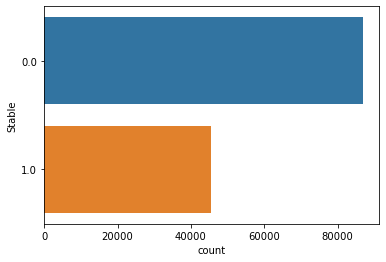

In [133]:
sns.countplot(y = dataset['Stable']);

In [159]:
# number of hydraulic tests for ML-ing
nr_examples_to_prepare =  int(len(sensordata)/60)
nr_examples_to_prepare

2195

In [160]:
# build training set
training_pairs = []
debug = False
for example in range(0,nr_examples_to_prepare):
    rnd_minute = np.random.randint(0,nr_examples_to_prepare-1)  # get a random test number
    start_test_row = rnd_minute * 60  # locate the start of the test in the dataset 
    if debug:
        #print(start_test_row)
        #print(sensordata.iloc[start_test_row])
        #print(dataset.iloc[start_test_row])
        print(f"test status: {dataset.iloc[start_test_row,1]}")
    window = scaled_sensor_data[start_test_row:start_test_row+60]
    window_vector = window.flatten()
    training_pairs.append( (window_vector, dataset.iloc[start_test_row,1]) )

In [161]:
len(training_pairs)

2195

In [162]:
input_vec_len = training_pairs[0][0].shape[0]
output_vec_len = 1

D = np.zeros( (nr_examples_to_prepare , input_vec_len+output_vec_len))
print("Shape of D is", D.shape)

# Fill data matrix D with input vec + output vec in each row
for nr in range(0,nr_examples_to_prepare):
    (x,y) = training_pairs[nr]
    D[nr,0:input_vec_len] = x
    D[nr,input_vec_len]   = y

Shape of D is (2195, 1021)


In [163]:
nr_train_samples = int(nr_examples_to_prepare/2)
x_train = D[0:nr_train_samples, 0:input_vec_len]
y_train = D[0:nr_train_samples, input_vec_len]

In [164]:
x_train.shape
y_train.shape

(1097, 1020)

(1097,)

In [165]:
x_test = D[nr_train_samples:, 0:input_vec_len]
y_test = D[nr_train_samples:, input_vec_len]

In [166]:
!pip install tensorflow

In [167]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [168]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(input_vec_len,)) )
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               204200    
_________________________________________________________________
dense_4 (Dense)              (None, 40)                8040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 212,281
Trainable params: 212,281
Non-trainable params: 0
_________________________________________________________________


In [169]:
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.6682
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.7338
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.7666
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.7958
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.7940
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.7858
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.8013
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.7748
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.7967
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.8022

In [170]:
history = model.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9663
Epoch 2/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9699
Epoch 3/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9699
Epoch 4/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9690
Epoch 5/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9663
Epoch 6/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9690
Epoch 7/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9717
Epoch 8/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9690
Epoch 9/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9736
Epoch 10/2000
35/35 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9617

In [171]:
type(history)

tensorflow.python.keras.callbacks.History

In [172]:
type(history.history)

dict

In [173]:
history.history["loss"][:20]

[0.031991854310035706,
 0.029218487441539764,
 0.03162135183811188,
 0.029994113370776176,
 0.03526607155799866,
 0.031776826828718185,
 0.030178174376487732,
 0.029763763770461082,
 0.02773286961019039,
 0.03752661496400833,
 0.030772356316447258,
 0.0324363149702549,
 0.03031007945537567,
 0.028969254344701767,
 0.035201381891965866,
 0.03420567885041237,
 0.03084755130112171,
 0.03281893581151962,
 0.029702788218855858,
 0.029247110709547997]

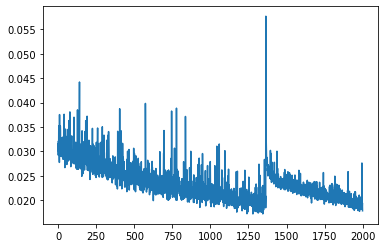

In [174]:
plt.plot(history.history["loss"])
plt.show();

In [175]:
preds = model.predict(x_test)

In [176]:
preds.shape

(1098, 1)

In [177]:
y_test.shape

(1098,)

In [178]:
preds = preds.flatten()

In [179]:
preds.shape

(1098,)

In [180]:
preds[:20]

array([ 0.86350155,  0.9817482 ,  0.90138197,  0.18865038, -0.00883717,
        1.0194427 ,  0.0312333 , -0.04135657,  0.93352646, -0.01823581,
        0.99651325,  0.13317831,  0.91637164, -0.02283246, -0.0603307 ,
       -0.04117198,  0.2888547 ,  0.998868  ,  0.04558783,  0.74297726],
      dtype=float32)

In [181]:
min(preds)
max(preds)

-0.19545884

1.1865445

In [185]:
pump_failure_in_future_window = 0
correctly_predicted_pump_failures = 0
correctly_predicted = 0
nr_test_samples = preds.shape[0]

tp = 0
tn = 0
fp = 0
fn = 0

for test_nr in range(0,nr_test_samples):
    ground_truth_output = y_test[test_nr]
    if preds[test_nr] < 0.5:
        predicted_output = 0.0
    else:
        predicted_output = 1.0
    print("Test example #{0}: ground truth vs. predicted machine status: {1} vs. {2}"
          .format(test_nr, ground_truth_output, predicted_output ))
    
    if predicted_output == ground_truth_output:
        correctly_predicted +=1
        
    if ground_truth_output==1:
        pump_failure_in_future_window += 1
        if predicted_output == ground_truth_output:
            correctly_predicted_pump_failures +=1
            
    if ground_truth_output==1:
        if predicted_output == ground_truth_output:
            # True positive:
            # There was a pump failure
            # and the MLP predictor predicted it
            tp+=1
        else:
            # False negative:
            # There was a pump failure
            # BUT the MLP predictor predicted it not
            fn+=1
            
    if ground_truth_output==0:        
        if predicted_output == ground_truth_output:
            # True negative:
            # There was no pump failure
            # and the MLP predictor predicted no pump failure
            tn+=1
        else:
            # False positive:
            # There was no pump failure
            # BUT the MLP predictor predicted a pump failure
            fp+=1
            
        
correct_classification_percent = (correctly_predicted/nr_test_samples)*100.0
print("\nCorrectly predicted {0} of {1} test examples --> {2}%"
      .format(correctly_predicted, nr_test_samples, correct_classification_percent))

print("\nIf there was really a pump failure in the future window,\n"
      "the MLP could predict it in {0} of the {1} pump failure (in future window) example cases."
      .format(correctly_predicted_pump_failures, pump_failure_in_future_window))

print("True positive:", tp)
print("True negative:", tn)
print("False positive:", fp)
print("False negative:", fn)

Test example #0: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #1: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #2: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #3: ground truth vs. predicted machine status: 1.0 vs. 0.0
Test example #4: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #5: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #6: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #7: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #8: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #9: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #10: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #11: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #12: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #13: ground truth vs. predicted machine status: 

In [219]:
def calculate_results(pred_count, preds):
    """
    :param: tests # number of predictions
    :param: preds # predictions
    """
    
    nr_test_samples = pred_count
    
    pump_failure_in_future_window = 0
    correctly_predicted_pump_failures = 0
    correctly_predicted = 0
    nr_test_samples = preds.shape[0]

    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for test_nr in range(0,nr_test_samples):
        ground_truth_output = y_test[test_nr]
        if preds[test_nr] < 0.5:
            predicted_output = 0.0
        else:
            predicted_output = 1.0
        print("Test example #{0}: ground truth vs. predicted machine status: {1} vs. {2}"
              .format(test_nr, ground_truth_output, predicted_output ))

        if predicted_output == ground_truth_output:
            correctly_predicted +=1

        if ground_truth_output==1:
            pump_failure_in_future_window += 1
            if predicted_output == ground_truth_output:
                correctly_predicted_pump_failures +=1

        if ground_truth_output==1:
            if predicted_output == ground_truth_output:
                # True positive:
                # There was a pump failure
                # and the MLP predictor predicted it
                tp+=1
            else:
                # False negative:
                # There was a pump failure
                # BUT the MLP predictor predicted it not
                fn+=1

        if ground_truth_output==0:        
            if predicted_output == ground_truth_output:
                # True negative:
                # There was no pump failure
                # and the MLP predictor predicted no pump failure
                tn+=1
            else:
                # False positive:
                # There was no pump failure
                # BUT the MLP predictor predicted a pump failure
                fp+=1


    correct_classification_percent = (correctly_predicted/nr_test_samples)*100.0
    print("\nCorrectly predicted {0} of {1} test examples --> {2}%"
          .format(correctly_predicted, nr_test_samples, correct_classification_percent))

    print("\nIf there was really a pump failure in the future window,\n"
          "the MLP could predict it in {0} of the {1} pump failure (in future window) example cases."
          .format(correctly_predicted_pump_failures, pump_failure_in_future_window))

    print("True positive:", tp)
    print("True negative:", tn)
    print("False positive:", fp)
    print("False negative:", fn)

# run validation dataset against model

In [240]:
sensordata_validate = dataset_validate.iloc[:,6:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sensordata_validate = scaler.fit_transform(sensordata_validate)
scaled_sensordata_validate[0]

array([0.03296237, 0.4556314 , 0.66303673, 0.16607685, 0.19078242,
       0.72944585, 0.39733179, 0.        , 0.0461437 , 0.04013841,
       0.98727762, 0.97767268, 0.98937379, 0.98812903, 0.36229205,
       0.4609696 , 0.02673797])

In [241]:
test_pairs = []
samples_per_test = 60
#samples_per_test = 30
for start in range(0,int(len(sensordata_validate)/60)):
    start = start * 60
    window = scaled_sensordata_validate[start:start+samples_per_test]
    window_vector = window.flatten()
    test_pairs.append( (window_vector,dataset_validate.iloc[start,1]))    

In [242]:
len(test_pairs)

10

In [243]:
input_vec_len = test_pairs[0][0].shape[0]
print(input_vec_len)
output_vec_len = 1

D = np.zeros( (len(test_pairs), input_vec_len+output_vec_len))
print("Shape of D is", D.shape)

# Fill data matrix D with input vec + output vec in each row
for nr in range(0,len(test_pairs)):
    (x,y) = test_pairs[nr]
    D[nr,0:input_vec_len] = x
    D[nr,input_vec_len]   = y

1020
Shape of D is (10, 1021)


In [244]:
x_test = D[0:len(test_pairs),0:input_vec_len]
y_test = D[0:len(test_pairs),input_vec_len]

In [245]:
# run inference
preds2 = model.predict(x_test)

In [246]:
preds2

array([[ 0.0668578 ],
       [ 0.30910677],
       [ 0.23749362],
       [ 0.29066086],
       [-0.11348759],
       [ 0.89923185],
       [ 0.7370888 ],
       [ 0.51843137],
       [ 0.34493017],
       [ 0.9298075 ]], dtype=float32)

In [247]:
calculate_results(10,preds2)

Test example #0: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #1: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #2: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #3: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #4: ground truth vs. predicted machine status: 0.0 vs. 0.0
Test example #5: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #6: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #7: ground truth vs. predicted machine status: 1.0 vs. 1.0
Test example #8: ground truth vs. predicted machine status: 1.0 vs. 0.0
Test example #9: ground truth vs. predicted machine status: 1.0 vs. 1.0

Correctly predicted 9 of 10 test examples --> 90.0%

If there was really a pump failure in the future window,
the MLP could predict it in 4 of the 5 pump failure (in future window) example cases.
True positive: 4
True negative: 5
False positive: 0
False negative: 1
